<a href="https://colab.research.google.com/github/singhdivyavardhan2004/NTIRE-HR-Depth-Mono-Challenge/blob/main/HR_DEPTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/NTIRE-Stereo-Depth_2025"

/content/drive/MyDrive/NTIRE-Stereo-Depth_2025


In [3]:
import os
ROOT="/content/drive/MyDrive/NTIRE-Stereo-Depth_2025"

print(os.listdir(ROOT))

['README.md', 'requirements.txt', 'LICENSE', '__pycache__', 'depth_anything', 'dataset_paths', 'metric_depth', 'controlnet', '.venv', 'checkpoints_new', 'dataset', 'semseg', '.git', 'dataset_creation.py', 'misc.py', 'val', 'dataset_paths.py', 'vis_depth_scaled', 'run.py', 'train.py']


In [ ]:
TRAIN_DATA="dataset/raw_training_data"
print(os.listdir(os.path.join(ROOT,TRAIN_DATA)))

['.gitkeep', 'Vodka', 'Toilet', 'TV2', 'Sink', 'SoapDishes', 'TV', 'Tablet', 'TV1', 'Washer', 'Shower', 'Oven2', 'Pots1', 'OilCan', 'Mirror', 'Moka1', 'Mouthwash', 'Motorcycle', 'Oven1', 'Microwave', 'Moka', 'ExtractorFan', 'Door', 'Fridge', 'Lunch', 'DogHouse', 'Case', 'CoffeeMaker', 'CashBox', 'Cooker1', 'Cosmetics', 'Bottles1', 'Bucket', 'Canteen', 'Bottle1', 'BottledWater', 'Bedroom', 'Bottle', 'Bathroom']


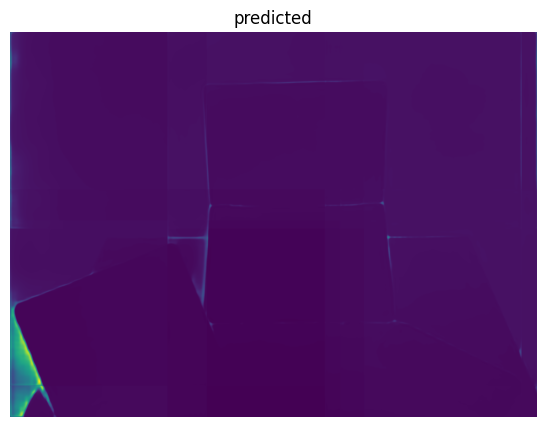

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

npy_file_path = "/content/drive/MyDrive/NTIRE-Stereo-Depth_2025/vis_depth_scaled/Desk/0001.npy"
data = np.load(npy_file_path)

plt.figure(figsize=(12, 5))
plt.imshow(data)
plt.title(f'predicted')
plt.axis('off') # Hide axes for image display


plt.show()

In [ ]:
from glob import glob
import os

if __name__ == '__main__':
    # Ensure this path matches your folder name exactly relative to where you run the script
    dataset_dir = "dataset/raw_training_data"

    # 1. Get absolute paths for the dataset folders
    search_path = os.path.abspath(dataset_dir)
    folders = glob(os.path.join(search_path, "*"))

    # Sort folders to ensure consistent order (optional)
    folders.sort()

    print(f"Found {len(folders)} subfolders in {search_path}")

    # 2. Write the paths to the text file
    # Ensure the output directory exists
    output_dir = "./dataset_paths"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    output_file = os.path.join(output_dir, "train_data.txt")

    with open(output_file, 'w') as f:
        count = 0
        for folder in folders:
            # Define the paths for the depth and mask files
            # These appear to be in the class root folder (e.g., inside 'CashBox')
            disp_path = os.path.join(folder, "disp_00.npy")
            mask_path = os.path.join(folder, "mask_cat.png")

            # Look for images inside the camera_00 subfolder
            images = glob(os.path.join(folder, "camera_00", "*.png"))
            images.sort() # Sort images to ensure consistent order (e.g., im0, im1, im2...)

            for img_path in images:
                # Write the triplet: Image Path + Space + Disp Path + Space + Mask Path
                line = f"{img_path} {disp_path} {mask_path}\n"
                f.write(line)
                count += 1

    print(f"Successfully wrote {count} image paths to {output_file}")

Found 38 subfolders in /content/drive/.shortcut-targets-by-id/14VgvJ7-f0YYzPO9pqBFIgrwpGCaKR_y3/NTIRE-Stereo-Depth_2025/dataset/raw_training_data
Successfully wrote 228 image paths to ./dataset_paths/train_data.txt


In [ ]:
!python dataset_creation.py --dataset_txt ./dataset_paths/train_data.txt

228it [40:35, 10.68s/it]


In [ ]:
!pip install -r requirements.txt

In [ ]:
!python train.py --train_txt dataset_paths/train_extended.txt --batch_size 2 --should_log 0 --epochs 7

2026-02-01 04:56:13.610361: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769921773.861723    8408 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769921773.930490    8408 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769921774.448405    8408 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769921774.448448    8408 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769921774.448453    8408 computation_placer.cc:177] computation placer alr

In [ ]:
!python dataset_paths.py

Found 3 subfolders in /content/drive/.shortcut-targets-by-id/14VgvJ7-f0YYzPO9pqBFIgrwpGCaKR_y3/NTIRE-Stereo-Depth_2025/val
Successfully wrote 15 image paths to /content/drive/.shortcut-targets-by-id/14VgvJ7-f0YYzPO9pqBFIgrwpGCaKR_y3/NTIRE-Stereo-Depth_2025/dataset_paths/test.txt


In [ ]:
!python run.py \
  --img-path ./dataset_paths/test.txt \
  --checkpoint ./checkpoints_/model_5.pt \
  --outdir ./submission_best_acc \